In [95]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn import preprocessing

In [96]:
df = pd.read_pickle('cicids2017_not_contain_monday_max.pkl')

In [97]:
from imblearn.under_sampling import RandomUnderSampler

In [98]:
x = df.drop(columns=[' Label'])
y = df[' Label']

In [99]:
rus = RandomUnderSampler(random_state=0, sampling_strategy={
    'BENIGN': 20000,
     'DDoS': 10000,
     'PortScan': 10000,
     'Bot': 1966,
     'Infiltration': 36,
     'FTP-Patator': 7938,
     'SSH-Patator': 5897,
     'DoS slowloris': 5796,
     'DoS Slowhttptest': 5499,
     'DoS Hulk': 10000,
     'DoS GoldenEye': 10293,
     'Heartbleed': 11
})

In [100]:
LABELS_12 = {
    'BENIGN': 0,
     'DDoS': 1,
     'PortScan': 2,
     'Bot': 3,
     'Infiltration': 4,
     'FTP-Patator': 5,
     'SSH-Patator': 6,
     'DoS slowloris': 7,
     'DoS Slowhttptest': 8,
     'DoS Hulk': 9,
     'DoS GoldenEye': 10,
     'Heartbleed': 11
}

In [101]:
x, y = rus.fit_resample(x, y)

In [102]:
label = [LABELS_12[v] for v in y]

In [103]:
Counter(label)

Counter({0: 20000,
         3: 1966,
         1: 10000,
         10: 10293,
         9: 10000,
         8: 5499,
         7: 5796,
         5: 7938,
         11: 11,
         4: 36,
         2: 10000,
         6: 5897})

In [104]:
df = x
df[' Label'] = label

In [105]:
df = df.dropna()

In [106]:
src_ip = df[' Source IP']
dst_ip = df[' Destination IP']
src_port = df[' Source Port']
dst_port = df[' Destination Port']

In [107]:
src_ip = np.array(src_ip)
dst_ip = np.array(dst_ip)
src_port = np.array(src_port)
dst_port = np.array(dst_port)

In [108]:
src_nodes = list(zip(src_ip, src_port))

In [109]:
dst_nodes = list(zip(dst_ip, dst_port))

In [110]:
socket_dict = list(zip(src_nodes, dst_nodes))

In [111]:
socket_dict2 = list(zip(dst_nodes, src_nodes))

In [112]:
socket_dict_n = set(socket_dict) & set(socket_dict2)

In [113]:
len(socket_dict_n)

1502

In [178]:
label = df[' Label']

In [179]:
len(label)

87390

### socket dict是节点的集合

In [22]:
# df.to_csv('all.csv')

In [114]:
x = df.drop(columns=[' Label', 'Flow ID',' Source IP',' Source Port', ' Destination IP', ' Destination Port',' Timestamp'])

In [115]:
x = x.replace(['Infinity','infinity ','inf', '-inf','INF','NaN','nan'], 0)

In [244]:
from sklearn.preprocessing import MinMaxScaler

In [245]:
mms = MinMaxScaler()

In [247]:
x_new = mms.fit_transform(x)

D:\anaconda\envs\lightgbm_catboost\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
D:\anaconda\envs\lightgbm_catboost\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [272]:
df2 = pd.DataFrame(x_new)

In [274]:
df2 = df2.fillna(0)

In [275]:
df2.isnull().any().any()

False

In [276]:
features3 = np.array(df2)

In [277]:
features3

array([[1.00000000e+00, 1.96217280e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.52941176e-01, 4.75001484e-07, 1.41262890e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.52941176e-01, 1.46625458e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.52941176e-01, 1.04619260e-01, 2.68399491e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.52941176e-01, 2.33334063e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.52941176e-01, 3.91667891e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [279]:
contain_nan = (True in np.isnan(features3))
contain_nan

False

### 归一化

In [116]:
x = (x - x.min())/ (x.max() - x.min())

In [250]:
features2 = np.array(x_new)

In [240]:
features2 = pd.DataFrame(features2)

In [242]:
features2.isnull().any().any()

True

In [118]:
# x.to_csv('features.csv', index=False, header=None)

In [119]:
len(features)

87390

In [120]:
socket_dict2 = list(zip(dst_nodes, src_nodes))

In [121]:
num_edge = len(src_nodes)
num_edge

87390

In [122]:
all_nodes = set(src_nodes).union(set(dst_nodes))

In [123]:
len(all_nodes)

45106

In [124]:
nodes_to_no_dict = dict()

In [125]:
for index,value in enumerate(all_nodes):
    nodes_to_no_dict[value] = index

# 首先进行编号

In [126]:
src_no = []
dst_no = []

In [127]:
for index in range(num_edge):
    src_value = src_nodes[index]
    dst_value = dst_nodes[index]
    src_no.append(nodes_to_no_dict[src_value])
    dst_no.append(nodes_to_no_dict[dst_value])
    

# 变成dict
## socket_dict_map代表每一个节点的属性

In [128]:
socket_dict_map = {}

In [129]:
for index, value in enumerate(socket_dict):
    if value not in socket_dict_map:
        socket_dict_map[value] = []
    socket_dict_map[value].append(index)
    
    

In [130]:
final_dict = {}

In [131]:
for key in socket_dict_map:
    value = socket_dict_map[key]
    src_socket, dst_socket = key[0], key[1]
    if src_socket not in final_dict:
        final_dict[src_socket] = []
    final_dict[src_socket].append(value)

In [132]:
final_dict

{('192.168.10.3', 61676): [[0, 1063]],
 ('192.168.10.17', 44855): [[1]],
 ('192.168.10.5', 55788): [[2]],
 ('192.168.10.5', 49790): [[3]],
 ('77.247.179.176', 443): [[4]],
 ('192.168.10.8', 1578): [[5]],
 ('192.168.10.15', 50947): [[6]],
 ('192.168.10.19', 4286): [[7]],
 ('192.168.10.16', 19403): [[8]],
 ('192.168.10.15', 58156): [[9]],
 ('192.168.10.19', 24551): [[10]],
 ('192.168.10.17', 31794): [[11]],
 ('192.168.10.3', 62524): [[12]],
 ('192.168.10.17', 123): [[13, 1638, 4183, 6712, 9367],
  [728, 4502, 17523],
  [908],
  [976, 13444, 16937],
  [1134],
  [1195, 8642, 12225, 19470],
  [1656, 4468],
  [1711],
  [1743],
  [2176, 6309, 9691, 10662, 11126, 14149, 18915],
  [2233, 2528],
  [2824, 10402, 14678],
  [2917],
  [3515],
  [3698],
  [3715, 9775, 18401],
  [3750],
  [4200, 10718],
  [4459, 10756, 11913, 15745],
  [4969, 14355],
  [4989, 14411],
  [5674],
  [5696, 11332, 11411, 13555, 16391, 17726],
  [5875],
  [7092, 18292],
  [7357],
  [8006],
  [8411, 9731, 11106],
  [9387, 12

In [133]:
final_dict2 = {}

In [134]:
for key in final_dict:
    value = final_dict[key]
    value = sum(value, [])
    final_dict2[key] = value

In [135]:
final_dict2

{('192.168.10.3', 61676): [0, 1063],
 ('192.168.10.17', 44855): [1],
 ('192.168.10.5', 55788): [2],
 ('192.168.10.5', 49790): [3],
 ('77.247.179.176', 443): [4],
 ('192.168.10.8', 1578): [5],
 ('192.168.10.15', 50947): [6],
 ('192.168.10.19', 4286): [7],
 ('192.168.10.16', 19403): [8],
 ('192.168.10.15', 58156): [9],
 ('192.168.10.19', 24551): [10],
 ('192.168.10.17', 31794): [11],
 ('192.168.10.3', 62524): [12],
 ('192.168.10.17', 123): [13,
  1638,
  4183,
  6712,
  9367,
  728,
  4502,
  17523,
  908,
  976,
  13444,
  16937,
  1134,
  1195,
  8642,
  12225,
  19470,
  1656,
  4468,
  1711,
  1743,
  2176,
  6309,
  9691,
  10662,
  11126,
  14149,
  18915,
  2233,
  2528,
  2824,
  10402,
  14678,
  2917,
  3515,
  3698,
  3715,
  9775,
  18401,
  3750,
  4200,
  10718,
  4459,
  10756,
  11913,
  15745,
  4969,
  14355,
  4989,
  14411,
  5674,
  5696,
  11332,
  11411,
  13555,
  16391,
  17726,
  5875,
  7092,
  18292,
  7357,
  8006,
  8411,
  9731,
  11106,
  9387,
  12726,
  

In [136]:
count = []

In [137]:
for k, v in final_dict2.items():
    len(v)

In [138]:
count_arr = []

In [139]:
for key in final_dict2:
    arr = final_dict2[key]
    c = len(arr)
    count_arr.append(c)

In [140]:
for key in final_dict2:
    arr = final_dict2[key]
    c = len(arr)
    if c > 700:
        print(key)

('205.174.165.73', 8080)


In [141]:
count_arr.sort(reverse=True)

In [142]:
count_arr = np.array(count_arr)

In [143]:
len(count_arr[count_arr > 1])

15691

# 先建立长度大于1的边

In [144]:
count = 0
N = len(final_dict2)

In [145]:
a = []
b = []
def build_edge_index(arr):
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            a.append(arr[i])
            b.append(arr[j])
        
                

In [146]:
for key in final_dict2:
    edge_arr = final_dict2[key]
    edge_arr_len = len(edge_arr)
    if edge_arr_len <= 1:
        continue
    # 建立边
    build_edge_index(edge_arr)
    count += 1


In [147]:
len(a)

532940

In [148]:
len(b)

532940

# 保存文件

In [149]:
a = np.array(a)

In [150]:
b = np.array(b)

In [61]:
# np.save('src_socket', a)

In [62]:
# np.save('dst_socket', b)

In [151]:
edges1 = set(zip(a, b))

In [152]:
edges2 = set(zip(b, a))

In [153]:
edges = edges1 | edges2

In [154]:
src_index = []
dst_index = []

In [155]:
for v in edges:
    src_index.append(v[0])
    dst_index.append(v[1])

In [156]:
index = [src_index, dst_index]

In [157]:
index

[[21169,
  20387,
  42307,
  53559,
  20720,
  78484,
  77243,
  78843,
  21895,
  53645,
  73497,
  20859,
  72918,
  11913,
  20887,
  70814,
  20622,
  76721,
  83555,
  18376,
  72193,
  53391,
  21435,
  21516,
  20725,
  78843,
  77243,
  75405,
  21484,
  20479,
  33309,
  20374,
  80784,
  20738,
  80927,
  20329,
  72850,
  21607,
  80639,
  20460,
  86424,
  74150,
  21566,
  72620,
  46143,
  20020,
  81254,
  42576,
  79643,
  21566,
  79774,
  76608,
  23995,
  78012,
  21394,
  52107,
  21876,
  74153,
  20963,
  73978,
  21516,
  20388,
  79119,
  21304,
  4486,
  72008,
  73898,
  44544,
  74212,
  6630,
  80992,
  33175,
  21712,
  20408,
  20900,
  79846,
  21237,
  21862,
  20216,
  20037,
  72487,
  20020,
  20419,
  61019,
  58879,
  59086,
  79409,
  20009,
  20408,
  69964,
  60632,
  56878,
  20375,
  56991,
  21916,
  21831,
  76830,
  20774,
  20900,
  80784,
  76617,
  45057,
  75619,
  21146,
  74654,
  20800,
  21475,
  42850,
  21237,
  20509,
  20769,
  2

In [158]:
index2 = np.array(index)

In [71]:
# np.save('index', index2)

In [159]:
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils.convert import to_networkx

In [160]:
index = torch.tensor(index, dtype=torch.long)

In [196]:
label = torch.tensor(label, dtype=torch.long)

In [280]:
features = np.array(features3)

In [281]:
features = torch.tensor(features, dtype=torch.float)

In [282]:
data = Data(x = features, edge_index=index.contiguous(), y = label)

In [365]:
alltrainidx = np.arange(data.num_nodes)

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
train_mask, test_mask = train_test_split(alltrainidx, test_size=0.25, stratify=label.numpy())

In [398]:
train_mask = torch.tensor(train_mask, dtype=torch.long)

In [399]:
test_mask = torch.tensor(test_mask, dtype=torch.long)

In [400]:
data.train_mask = train_mask

In [401]:
data.test_mask = test_mask

In [283]:
len(data.y),len(data.x)

(87390, 87390)

In [284]:
data.num_nodes

87390

In [285]:
data.num_edges

1065880

In [286]:
data.num_node_features

78

In [287]:
data.has_isolated_nodes()

True

In [288]:
data.has_self_loops()

False

In [289]:
data.is_directed()

False

In [290]:
data.is_undirected()

True

In [262]:
def graph_showing(data):
    '''
    args:
         data: torch_geometric.data.Data
    '''

    G = nx.Graph()
    edge_index = data['edge_index'].t()
    #     print(edge_index)
    edge_index = np.array(edge_index.cpu())
    #     print(edge_index)

    G.add_edges_from(edge_index)
    print(nx.is_connected(G))
    print(nx.number_connected_components(G))
    subgraph = list(G.subgraph(c) for c in nx.connected_components(G))
    min_subgraph = 0
    g = None
    for s in subgraph:
        if min_subgraph < len(s):
            min_subgraph = len(s)
            g = s
    print(min_subgraph)
    print(nx.number_of_edges(g))

In [210]:
graph_showing(data)

False
15691
705
248160


In [291]:
features

tensor([[1.0000e+00, 1.9622e-04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.5294e-01, 4.7500e-07, 1.4126e-04,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.5294e-01, 1.4663e-04, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [3.5294e-01, 1.0462e-01, 2.6840e-03,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.5294e-01, 2.3333e-07, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.5294e-01, 3.9167e-07, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [478]:
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GATConv,ResGatedGraphConv,GATv2Conv,SAGEConv,GCNConv
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.loader import NeighborSampler, NeighborLoader
import copy
import tqdm

In [479]:
num_class = 12
features_num = 78
hidden1 = 32
hidden2 = 16

In [480]:
class SAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))

    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:
                x = x.relu_()
                x = F.dropout(x, p=0.25, training=self.training)
        return x

    @torch.no_grad()
    def inference(self, x_all, subgraph_loader):
        # Compute representations of nodes layer by layer, using *all*
        # available edges. This leads to faster computation in contrast to
        # immediately computing the final representations of each batch:
        for i, conv in enumerate(self.convs):
            xs = []
            for batch in subgraph_loader:
                x = x_all[batch.n_id.to(x_all.device)].to(device)
                x = conv(x, batch.edge_index.to(device))
                if i < len(self.convs) - 1:
                    x = x.relu_()
                xs.append(x[:batch.batch_size].cpu())
            x_all = torch.cat(xs, dim=0)
        return x_all


In [500]:
device = torch.device('cuda:0')
model = SAGE(features_num, hidden2, num_class).to(device)  # 定义GAT
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [482]:
train_loader = NeighborLoader(data, input_nodes = data.train_mask, num_neighbors=[25, 10], batch_size=1024, shuffle=True)

In [511]:
subgraph_loader = NeighborLoader(copy.copy(data), input_nodes=None,num_neighbors=[25, 10], batch_size=1024, shuffle=False)
del subgraph_loader.data.x, subgraph_loader.data.y
# Add global node index information.
subgraph_loader.data.num_nodes = data.num_nodes
subgraph_loader.data.n_id = torch.arange(data.num_nodes)

In [485]:
loss_all = []

In [486]:
epochs = 10

In [487]:
def train():
    model.train()
    total_loss = total_correct = total_examples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        y = batch.y[:batch.batch_size]
        y_hat = model(batch.x, batch.edge_index.to(device))[:batch.batch_size]
        loss = F.cross_entropy(y_hat, y)
        loss_all.append(loss)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * batch.batch_size
        total_correct += int((y_hat.argmax(dim=-1) == y).sum())
        total_examples += batch.batch_size
    return total_loss / total_examples, total_correct / total_examples

In [509]:
from sklearn.metrics import f1_score, classification_report

In [512]:
@torch.no_grad()
def test():
    model.eval()
    y_hat = model.inference(data.x, subgraph_loader).argmax(dim=-1)
    y = data.y.to(y_hat.device)
    print(y)
    print(y_hat)
    cr = classification_report(y, y_hat)
    print(cr)
    accs = []
#     for mask in [data.train_mask, data.test_mask]:
#         accs.append(int((y_hat[mask] == y[mask]).sum()) / int(mask.sum()))
#     return cr


# for epoch in range(epochs):
#     loss, acc = train()
#     print(f'Epoch {epoch:02d}, Loss: {loss:.4f}, Approx. Train: {acc:.4f}')

test()
# print(f'Epoch: {epoch:02d}, Train: {train_acc:.4f}', f'Test: {test_acc:.4f}')


tensor([0, 0, 0,  ..., 6, 6, 6])
tensor([7, 7, 7,  ..., 7, 7, 7])
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19993
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00      1966
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00      7938
           6       0.00      0.00      0.00      5897
           7       0.07      1.00      0.13      5796
           8       0.00      0.00      0.00      5499
           9       0.13      0.00      0.01      9961
          10       0.00      0.00      0.00     10293
          11       0.00      0.00      0.00        11

    accuracy                           0.07     87390
   macro avg       0.02      0.08      0.01     87390
weighted avg       0.02      0.07      0.01     87390



D:\anaconda\envs\lightgbm_catboost\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\lightgbm_catboost\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\lightgbm_catboost\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


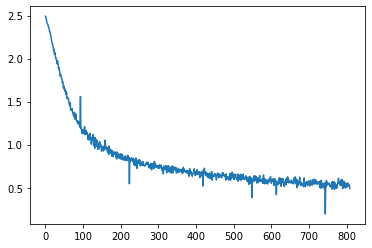

In [513]:
plt.plot(loss_all)

# 处理

In [85]:
# import pandas as pd
# from collections import Counter
# import numpy as np
# import pickle
# import sys

In [86]:
# src_socket = np.load('src_socket.npy')

In [87]:
# def list_to_csv():
#     with open('a.csv', 'w') as f:
#         for i in range(len(src_socket)):
#             f.write(str(src_socket[i]))
#             f.write(",")
#             f.write(str(dst_socket[i]))
#             f.write("\n") 


In [88]:
# list_to_csv()

In [89]:
# df = pd.read_csv('a.csv')

In [90]:
# df.head()

In [91]:
# df = df.drop_duplicates()

In [92]:
# df.head()

In [93]:
# len(df)